In [1]:
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import astropy.units as u

In [2]:
#decals_splus = Table.read('GalfitM_sex_DECALS_SPLUS_17_xmatch.csv')
#decals_splus

In [2]:
model = Table.read('GalfitM_output_DECALS_SPLUS_17.csv', format='ascii')
splus = Table.read('/home/seba/Documents/CG/MorphoPLUS_SFCGs/Morphoplus_groups/Catalogos_try/GalfitM_output_final_3.csv', format='ascii')
#s = splus.group_by('Group')
#keys = s.groups.keys
#print(keys)
#splus_26 = splus[splus['Group']==26]
#splus = splus[np.argsort(splus['Gal'])]
#model_235 = model[model['Group']==235]
#model_235

In [3]:
# Mostrar los nombres de las columnas antes del cambio
#print("Nombres de columnas antes del cambio:", splus.colnames)

# Definir las columnas que deseas cambiar
columnas_a_cambiar = ['n_R', 'n_G', 'n_I', 'n_Z', 'RE_R', 'RE_G', 'RE_I', 'RE_Z', 'MAG_R', 'MAG_G', 'MAG_I', 'MAG_Z']

# Crear un diccionario para mapear los nombres antiguos a los nuevos solo para las columnas específicas
column_mapping = {col: re.sub(r'_(G|R|I|Z)', lambda x: f'_{x.group(1).lower()}', col) for col in columnas_a_cambiar}

# Renombrar las columnas en la tabla
for old_name, new_name in column_mapping.items():
    if old_name in splus.colnames:
        splus.rename_column(old_name, new_name)
print(splus.colnames)

['Group', 'Gal', 'ID', 'CHI2NU', 'XC_R', 'e_XC_R', 'YC_R', 'e_YC_R', 'MAG_r', 'e_MAG_R', 'RE_r', 'e_RE_R', 'n_r', 'e_n_R', 'AR_R', 'e_AR_R', 'PA_R', 'e_PA_R', 'XC_J0378', 'e_XC_J0378', 'YC_J0378', 'e_YC_J0378', 'MAG_J0378', 'e_MAG_J0378', 'RE_J0378', 'e_RE_J0378', 'n_J0378', 'e_n_J0378', 'AR_J0378', 'e_AR_J0378', 'PA_J0378', 'e_PA_J0378', 'XC_J0395', 'e_XC_J0395', 'YC_J0395', 'e_YC_J0395', 'MAG_J0395', 'e_MAG_J0395', 'RE_J0395', 'e_RE_J0395', 'n_J0395', 'e_n_J0395', 'AR_J0395', 'e_AR_J0395', 'PA_J0395', 'e_PA_J0395', 'XC_J0410', 'e_XC_J0410', 'YC_J0410', 'e_YC_J0410', 'MAG_J0410', 'e_MAG_J0410', 'RE_J0410', 'e_RE_J0410', 'n_J0410', 'e_n_J0410', 'AR_J0410', 'e_AR_J0410', 'PA_J0410', 'e_PA_J0410', 'XC_J0430', 'e_XC_J0430', 'YC_J0430', 'e_YC_J0430', 'MAG_J0430', 'e_MAG_J0430', 'RE_J0430', 'e_RE_J0430', 'n_J0430', 'e_n_J0430', 'AR_J0430', 'e_AR_J0430', 'PA_J0430', 'e_PA_J0430', 'XC_J0515', 'e_XC_J0515', 'YC_J0515', 'e_YC_J0515', 'MAG_J0515', 'e_MAG_J0515', 'RE_J0515', 'e_RE_J0515', 'n_J051

In [4]:
filtros = ['g', 'r', 'i', 'z']
#filtros_splus = ['G', 'R', 'I', 'Z']
for filtro in filtros:        
    model['n_' + filtro] = pd.to_numeric(model['n_' + filtro], errors='coerce')
    model['RE_' +filtro] = pd.to_numeric(model['RE_' + filtro], errors = 'coerce')
for fil in filtros:
    splus['n_' + fil] = pd.to_numeric(splus['n_' + fil], errors='coerce')
    splus['RE_' +fil] = pd.to_numeric(splus['RE_' + fil], errors = 'coerce')
    splus['MAG_' +fil] = pd.to_numeric(splus['MAG_' + fil], errors = 'coerce')
    


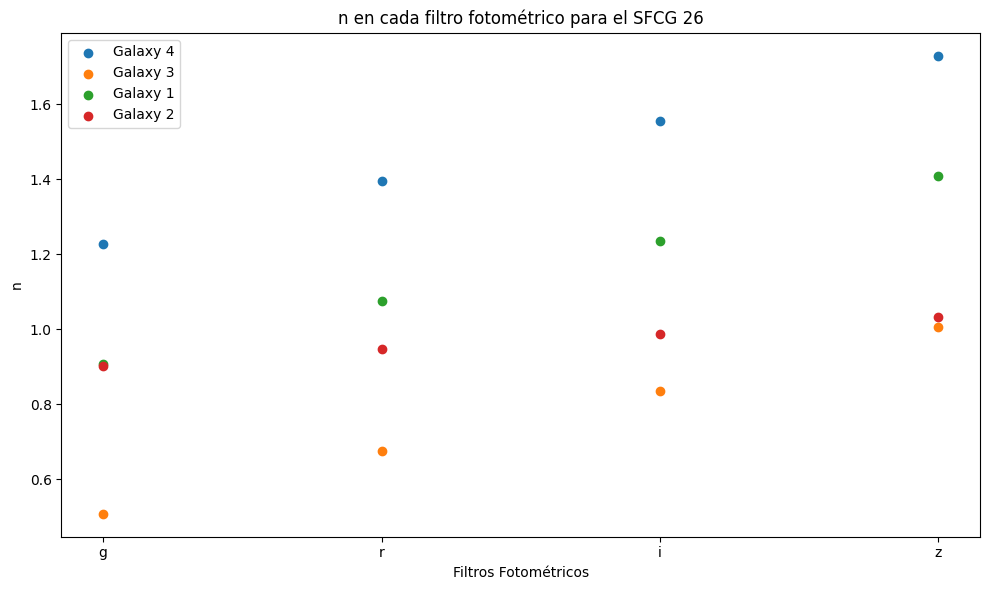

In [88]:
#Para el grupo 235
model_26 = model[model['Group']==26]
# Lista de filtros fotométricos
filtros = ['g', 'r', 'i', 'z']

# Supongamos que sersic es un DataFrame de pandas
# Asegúrate de que sersic tenga las mismas columnas que filtros
# Si las columnas no están en el mismo orden que los filtros, ajusta el orden
valores_sersic = np.array([model_26['n_' + filtro] for filtro in filtros])

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
for i in range(len(model_26)):
    gal = model['Gal'][i]
    plt.scatter(filtros, valores_sersic[:, i], label=f'Galaxy {gal}')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('n')
plt.title('n en cada filtro fotométrico para el SFCG 26')
plt.legend()
plt.tight_layout()
plt.ylim()

# Mostrar el gráfico
plt.show()

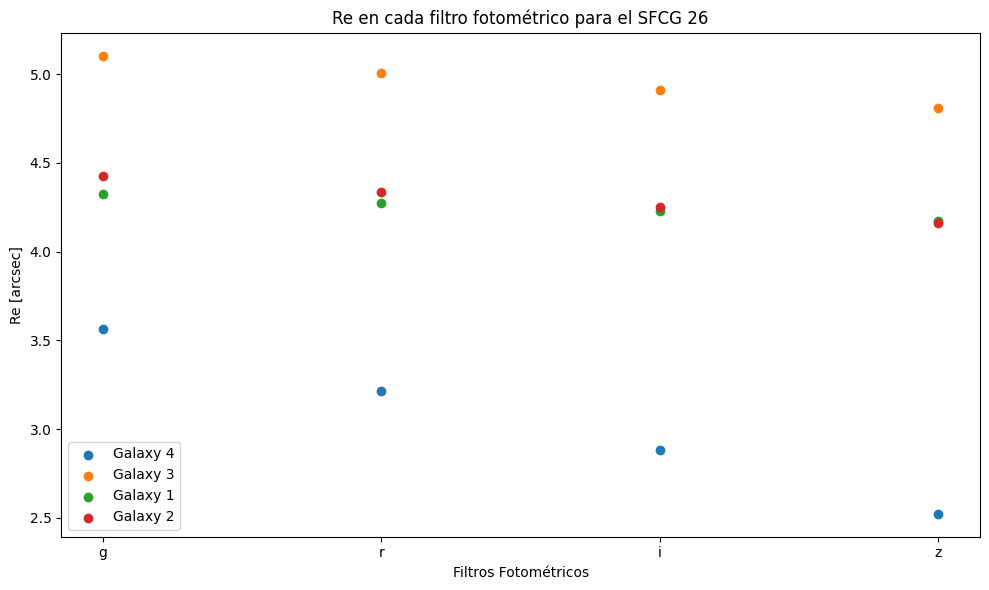

In [84]:
# Lista de filtros fotométricos
filtros = ['g', 'r', 'i', 'z']

# Supongamos que sersic es un DataFrame de pandas
# Asegúrate de que sersic tenga las mismas columnas que filtros
# Si las columnas no están en el mismo orden que los filtros, ajusta el orden
valores_re = np.array([model_26['RE_' + filtro] for filtro in filtros])

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
for i in range(len(model_26)):
    gal = model_26['Gal'][i]
    #print(filtros)
    #print(valores_sersic[:, i])
    #print()
    plt.scatter(filtros, valores_re[:, i]*0.262, label=f'Galaxy {gal}')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('Re [arcsec]')
plt.title('Re en cada filtro fotométrico para el SFCG 26')
plt.legend()
plt.tight_layout()
plt.ylim()

# Mostrar el gráfico
plt.show()

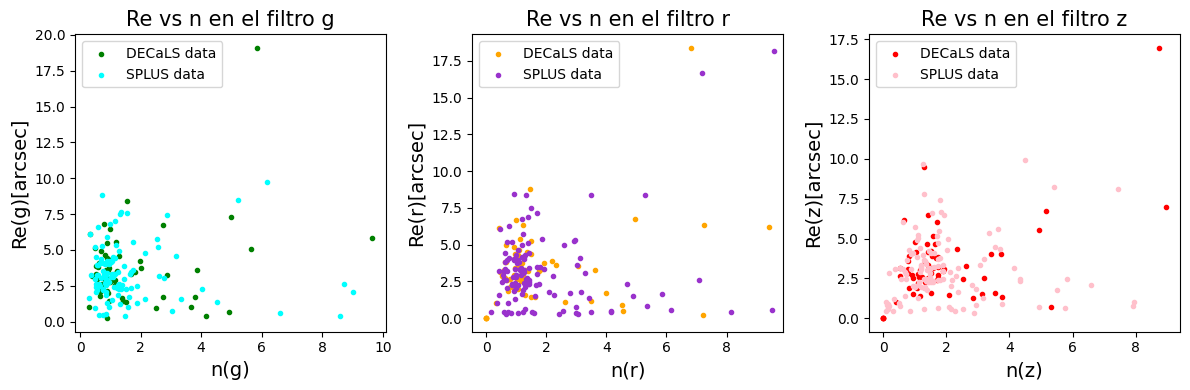

In [38]:
# Función para graficar Re vs n en grz.
def graficar_re_n(axs, archivo, color_g, color_r, color_z, label, pixel_scale):
    
    # Convertir las columnas de interés a tipos de datos numéricos
    for filtro in filtros:
        archivo['n_' + filtro] = pd.to_numeric(archivo['n_' + filtro], errors='coerce')
        archivo['RE_' +filtro] = pd.to_numeric(archivo['RE_' + filtro], errors = 'coerce')
    
    axs[0].scatter(archivo['n_g'], archivo['RE_g']*pixel_scale, label=label, color=color_g, marker='.')
    axs[0].set_xlabel('n(g)', fontsize = 14)
    axs[0].set_ylabel('Re(g)[arcsec]', fontsize=14)
    axs[0].set_title(f'Re vs n en el filtro g', fontsize=15)
    axs[0].set_xlim()
    axs[0].set_ylim()

    axs[1].scatter(archivo['n_r'], archivo['RE_r']*pixel_scale, label=label, color=color_r, marker='.')
    axs[1].set_xlabel('n(r)', fontsize = 14)
    axs[1].set_ylabel('Re(r)[arcsec]', fontsize=14)
    axs[1].set_title(f'Re vs n en el filtro r', fontsize=15)
    axs[1].set_xlim()
    axs[1].set_ylim()

    axs[2].scatter(archivo['n_z'], archivo['RE_z']*pixel_scale, label=label, color=color_z, marker='.')
    axs[2].set_xlabel('n(z)', fontsize = 14)
    axs[2].set_ylabel('Re(z)[arcsec]', fontsize=14)
    axs[2].set_title(f'Re vs n en el filtro z', fontsize=15)
    axs[2].set_xlim()
    axs[2].set_ylim()
    
    # Añadir leyenda en cada sub-gráfico
    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Graficar
graficar_re_n(axs[:], model, 'green', 'orange', 'red', 'DECaLS data', 0.262)
graficar_re_n(axs[:], splus, 'cyan', 'darkorchid', 'pink', 'SPLUS data', 0.55)
# Ajustar diseño y mostrar gráficos
plt.legend()
plt.tight_layout()
plt.show()

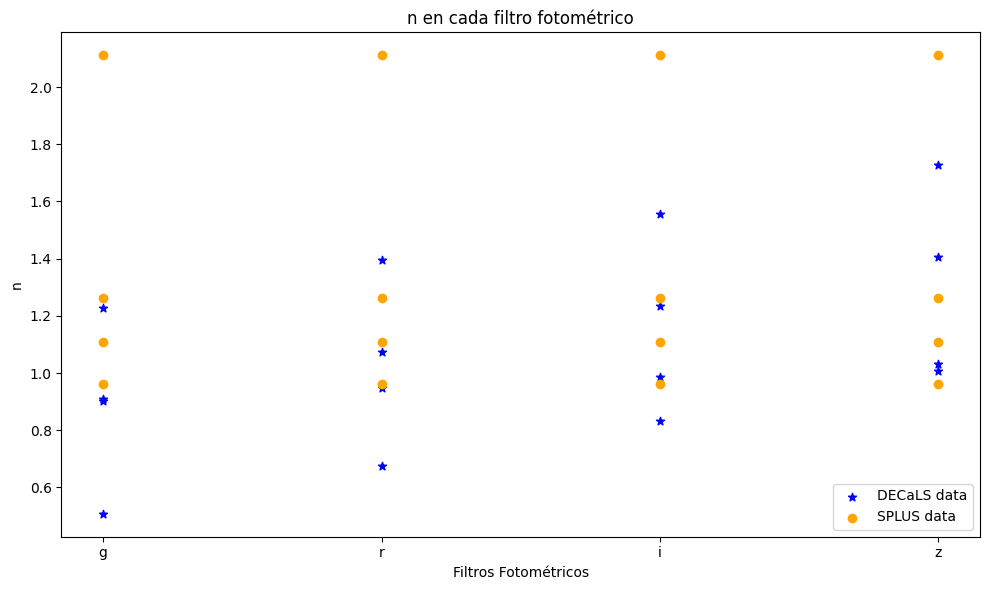

In [79]:
#Comparación entre ambos surveys para el grupo 235
splus_26 = splus[splus['Group'] == 26]

# Lista de filtros fotométricos
filtros = ['g', 'r', 'i', 'z']

# Convertir las columnas de interés a tipos de datos numéricos
for filtro in filtros:
    splus['n_' + filtro] = pd.to_numeric(splus['n_' + filtro], errors='coerce')
    #splus['MAG_' +filtro] = pd.to_numeric(splus['MAG_' + filtro], errors = 'coerce')
# Si las columnas no están en el mismo orden que los filtros, ajusta el orden
valores_sersic = np.array([model_26['n_' + filtro] for filtro in filtros])
valores_sersic_splus = np.array([splus_26['n_'+fil] for filtro in filtros])

# Convertir las columnas 'Gal' a Series de pandas
galaxias_model = pd.Series(model_26['Gal'])
galaxias_splus = pd.Series(splus_26['Gal'])

# Crear diccionario para mapear cada número de galaxia a un color único
galaxias = pd.concat([galaxias_model, galaxias_splus]).unique()
colores = plt.cm.rainbow(np.linspace(0, 1, len(galaxias)))
color_dict = {galaxia: color for galaxia, color in zip(galaxias, colores)}

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
for i in range(len(model_26)):
    gal = model_26['Gal'][i]
    color = color_dict[gal]
    plt.scatter(filtros, valores_sersic[:, i], marker='*', color='blue', label=f'DECaLS data')
    
for i in range(len(splus_26)):
    gal = splus_26['Gal'][i]
    color = color_dict[gal]
    plt.scatter(filtros, valores_sersic_splus[:, i], marker='o', color='orange', label='SPLUS data')
# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('n')
plt.title('n en cada filtro fotométrico')
#plt.legend()

# Evitar duplicados en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

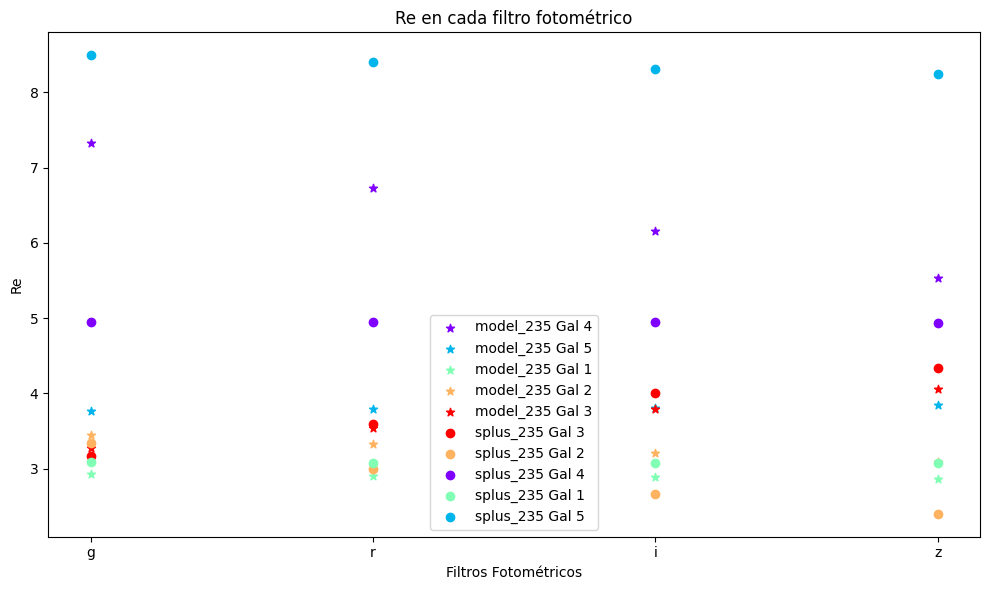

In [55]:
# Si las columnas no están en el mismo orden que los filtros, ajusta el orden
valores_re = np.array([model_235['RE_' + filtro] for filtro in filtros])
valores_re_splus = np.array([splus_235['RE_'+filtro] for filtro in filtros])

# Convertir las columnas 'Gal' a Series de pandas
galaxias_model = pd.Series(model_235['Gal'])
galaxias_splus = pd.Series(splus_235['Gal'])

# Crear diccionario para mapear cada número de galaxia a un color único
galaxias = pd.concat([galaxias_model, galaxias_splus]).unique()
colores = plt.cm.rainbow(np.linspace(0, 1, len(galaxias)))
color_dict = {galaxia: color for galaxia, color in zip(galaxias, colores)}

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
for i in range(len(model_235)):
    gal = model_235['Gal'][i]
    color = color_dict[gal]
    plt.scatter(filtros, valores_re[:, i]*0.262, marker='*', color=color, label=f'model_235 Gal {gal}')
    
for i in range(len(splus_235)):
    gal = splus_235['Gal'][i]
    color = color_dict[gal]
    plt.scatter(filtros, valores_re_splus[:, i]*0.55, marker='o', color=color, label=f'splus_235 Gal {gal}')
# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('Re')
plt.title('Re en cada filtro fotométrico')
#plt.legend()

# Evitar duplicados en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [56]:
valores_sersic = np.array([model['n_' + filtro] for filtro in filtros])
valores_sersic_splus = np.array([splus['n_'+filtro] for filtro in filtros])
# Función para calcular la mediana sin NaN y ceros
def calcular_mediana_sin_nan_ni_ceros(valores):
    # Filtrar NaN y ceros
    valores_filtrados = valores[(~np.isnan(valores)) & (valores != 0)]
    if len(valores_filtrados) > 0:
        return np.median(valores_filtrados)
    else:
        return np.nan

# Calcular medianas para cada filtro en 'valores_sersic'
medianas_valores_sersic = np.array([calcular_mediana_sin_nan_ni_ceros(valores_sersic[i]) for i in range(len(filtros))])

# Calcular medianas para cada filtro en 'valores_sersic_splus'
medianas_valores_sersic_splus = np.array([calcular_mediana_sin_nan_ni_ceros(valores_sersic_splus[i]) for i in range(len(filtros))])

# Imprimir resultados
print("Medianas para valores_sersic:")
print(medianas_valores_sersic)

print("\nMedianas para valores_sersic_splus:")
print(medianas_valores_sersic_splus)                                


Medianas para valores_sersic:
[0.9389  1.1883  1.37525 1.5111 ]

Medianas para valores_sersic_splus:
[1.0666  1.24275 1.39305 1.4659 ]


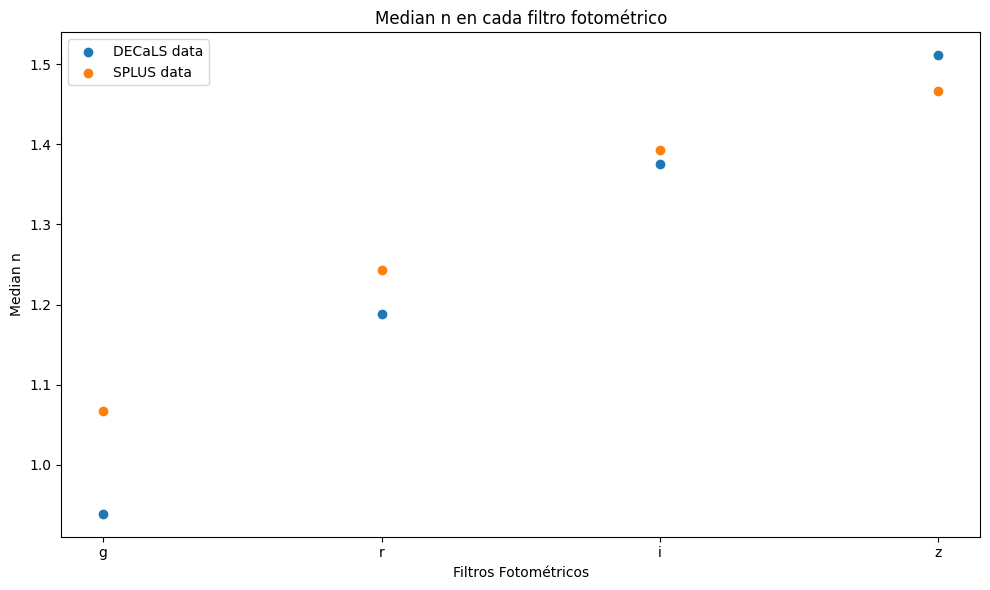

In [57]:
# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))

plt.scatter(filtros, medianas_valores_sersic, label='DECaLS data')
plt.scatter(filtros, medianas_valores_sersic_splus, label='SPLUS data')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('Median n')
plt.title('Median n en cada filtro fotométrico')
#plt.legend()

plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [58]:
valores_re = np.array([model['RE_' + filtro] for filtro in filtros])
valores_re_splus = np.array([splus['RE_'+filtro] for filtro in filtros])
# Función para calcular la mediana sin NaN y ceros
def calcular_mediana_sin_nan_ni_ceros(valores):
    # Filtrar NaN y ceros
    valores_filtrados = valores[(~np.isnan(valores)) & (valores != 0)]
    if len(valores_filtrados) > 0:
        return np.median(valores_filtrados)
    else:
        return np.nan

# Calcular medianas para cada filtro en 'valores_sersic'
medianas_valores_re = np.array([calcular_mediana_sin_nan_ni_ceros(valores_re[i]) for i in range(len(filtros))])

# Calcular medianas para cada filtro en 'valores_sersic_splus'
medianas_valores_re_splus = np.array([calcular_mediana_sin_nan_ni_ceros(valores_re_splus[i]) for i in range(len(filtros))])

# Imprimir resultados
print("Medianas para valores_re:")
print(medianas_valores_re)

print("\nMedianas para valores_re_splus:")
print(medianas_valores_re_splus)

Medianas para valores_re:
[12.5435 12.2872 11.8041 11.6785]

Medianas para valores_re_splus:
[5.6099  5.0591  4.82305 4.669  ]


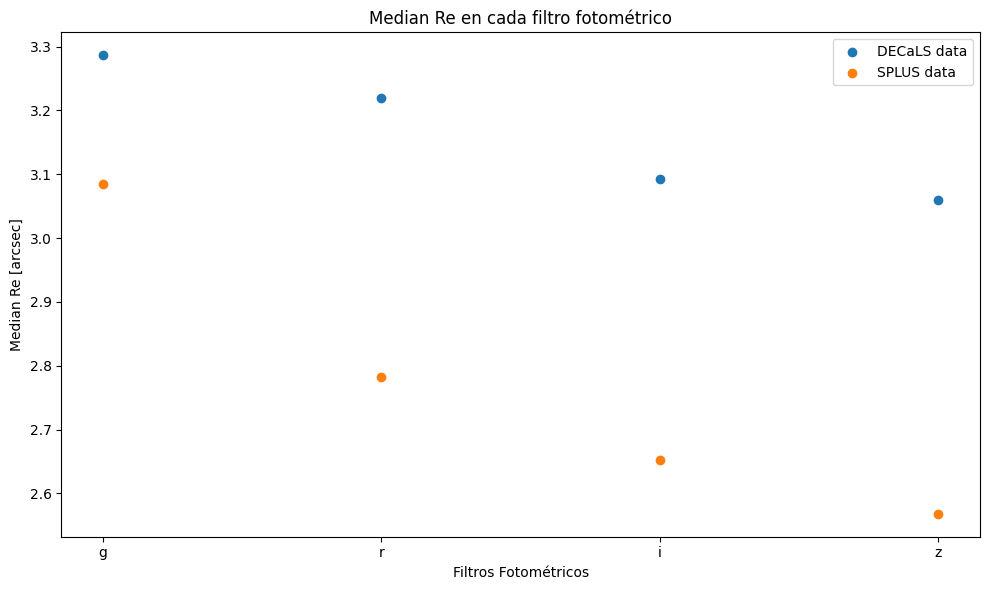

In [85]:
# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))

plt.scatter(filtros, medianas_valores_re*0.262, label='DECaLS data')
plt.scatter(filtros, medianas_valores_re_splus*0.55, label='SPLUS data')

# Personalizar el gráfico
plt.xticks(range(len(filtros)), filtros)  # Etiquetas del eje x
plt.xlabel('Filtros Fotométricos')
plt.ylabel('Median Re [arcsec]')
plt.title('Median Re en cada filtro fotométrico')
#plt.legend()

plt.legend()

plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [86]:
# Obtener los grupos únicos en la tabla model
model_groups = set(model['Group'])

# Filtrar la tabla splus para que contenga solo los grupos presentes en model
filtered_splus = splus[np.isin(splus['Group'], list(model_groups))]


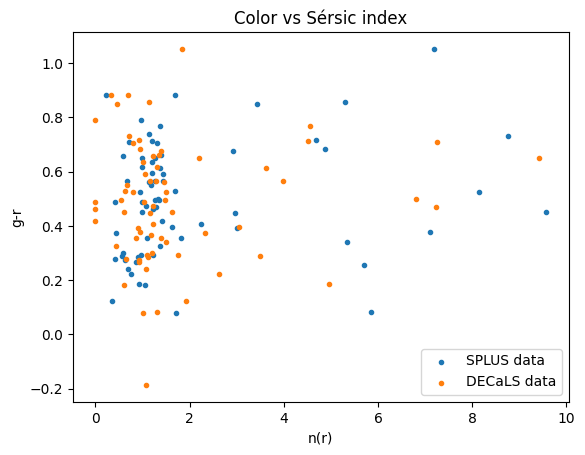

In [87]:
u_r_o = filtered_splus['MAG_g'] - filtered_splus['MAG_r']
g_r_model = model['MAG_g'] - model['MAG_r']
plt.scatter(filtered_splus['n_r'], u_r_o, marker='.', label='SPLUS data')
plt.scatter(model['n_r'], u_r_o, marker='.', label='DECaLS data')

#plt.ylim(-3, 5)
#plt.xlim(0, )
plt.title('Color vs Sérsic index')
plt.xlabel('n(r)')
plt.ylabel('g-r')
# Añadir una línea horizontal en y=50
plt.legend()
#plt.axhline(y=2.3, color='r', linestyle='--')

# Añadir una línea vertical en x=5
#plt.axvline(x=2.5, color='g', linestyle='--')
plt.show()

In [5]:
decals_data = Table.read('GalfitM_DECALS_SPLUS_17.csv')
filtros = ['g', 'r', 'i', 'z']
#filtros_splus = ['G', 'R', 'I', 'Z']
for filtro in filtros:        
    decals_data['n_' + filtro] = pd.to_numeric(decals_data['n_' + filtro], errors='coerce')
    decals_data['RE_' +filtro] = pd.to_numeric(decals_data['RE_' + filtro], errors = 'coerce')
    
decals_data

X_IMAGE,Y_IMAGE,ALPHAPEAK_J2000,DELTAPEAK_J2000,ALPHA_SKY,DELTA_SKY,FLUX_RADIUS,KRON_RADIUS,FLAGS,FLUX_APER,FLUXERR_APER,ELONGATION,THETA_IMAGE,MAG_AUTO,MAGERR_AUTO,SNR_WIN,brickid,brickname,objid,type,ra_1,dec_1,ebv,flux_g,flux_r,flux_i,flux_z,psfsize_g,psfsize_r,psfsize_i,psfsize_z,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,mag_g_1,mag_r_1,mag_i_1,mag_z_1,mag_w1,mag_w2,mag_w3,mag_w4,g_r,r_i,r_z,i_z,_RAJ2000,_DEJ2000,Group_1,Gal_1,RAJ2000,DEJ2000,zmemb,gmemb,FUV,NUV,Simbad,Separation,Group_2,Gal_2,ID,ra_2,dec_2,CHI2NU,XC_g,e_XC_g,YC_g,e_YC_g,RE_g,e_RE_g,MAG_g_2,e_MAG_g,n_g,e_n_g,AR_g,e_AR_g,PA_g,e_PA_g,XC_r,e_XC_r,YC_r,e_YC_r,RE_r,e_RE_r,MAG_r_2,e_MAG_r,n_r,e_n_r,AR_r,e_AR_r,PA_r,e_PA_r,XC_i,e_XC_i,YC_i,e_YC_i,RE_i,e_RE_i,MAG_i_2,e_MAG_i,n_i,e_n_i,AR_i,e_AR_i,PA_i,e_PA_i,XC_z,e_XC_z,YC_z,e_YC_z,RE_z,e_RE_z,MAG_z_2,e_MAG_z,n_z,e_n_z,AR_z,e_AR_z,PA_z,e_PA_z
float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,str8,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str11,str11,float64,int64,float64,float64,str6,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64
430.9527,765.6969,16.8474007,-32.8290287,16.8474048,-32.8290508,8.133,3.5,0,319.7858,0.0278081,1.938,-73.95,13.7993,0.0001,18870.0,151766,0167m327,7828,SER,16.84741713183292,-32.8290673708472,0.028982436,414.1549,920.47723,1297.2289,1622.3225,1.373282,1.2616813,1.158947,1.0554078,1.5113742,4127151.8,3.0896199,5022205.0,0.37618887,133092096.0,0.22846216,113639320.0,15.957093,15.089968,14.717459,14.474657,14.970778,15.49166,15.527465,--,0.8671255,0.372509,0.61531067,0.24280167,16.8474167,-32.8291111,26,4,01 07 23.38,-32 49 44.8,0.035811,--,19.5974,18.7922,Simbad,0.1574303699103669,26,4,7828,16.84741713183292,-32.8290673708472,0.793479330916477,430.8808,0.0004,765.8698,0.0008,13.6116,0.0037,15.9679,0.0002,1.2265,0.0009,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,12.2773,0.0024,15.0434,0.0001,1.3947,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,11.0043,0.0021,14.7278,0.0001,1.5551,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,9.6262,0.0033,14.4175,0.0002,1.7287,0.0010,0.3725,0.0001,16.5187,0.0053
597.8245,728.4967,16.8329356,-32.8317906,16.8329509,-32.8317545,12.645,3.5,0,89.86029,0.0278938,3.047,-41.65,14.4799,0.0003,6602.0,151766,0167m327,9564,DUP,16.83293887916162,-32.8317691155815,0.029134303,0.0,0.0,0.0,0.0,1.373282,1.2616813,1.158947,1.0554078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,inf,inf,inf,inf,inf,inf,--,--,--,--,16.8327917,-32.8316944,26,3,01 07 19.87,-32 49 54.1,0.035194,--,19.3174,18.4741,Simbad,0.5201547326875124,26,3,9564,16.83293887916162,-32.8317691155815,0.793479330916477,597.545,0.0023,728.8289,0.002,19.4817,0.0051,16.4851,0.0003,0.5078,0.0006,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,19.1042,0.0032,15.7766,0.0002,0.6747,0.0004,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,18.744,0.0043,15.4747,0.0003,0.8339,0.0005,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,18.354,0.0073,15.1926,0.0004,1.0063,0.0009,0.2544,0.0001,49.8399,0.0051
946.8118,675.7816,16.8027048,-32.8356348,16.8027211,-32.835578,15.13,3.56,0,12.28571,0.02797923,1.088,-60.31,16.1499,0.0015,1209.0,151766,0167m327,6445,RE

In [6]:
grouped_decals = decals_data.group_by('Group_1')

valid_groups=[]

for group in grouped_decals.groups:
    if any (group['zmemb'] != 0):
        valid_groups.append(group['Group_1'][0])

filtered_table = decals_data[np.isin(decals_data['Group_1'], valid_groups)]
filtered_table

X_IMAGE,Y_IMAGE,ALPHAPEAK_J2000,DELTAPEAK_J2000,ALPHA_SKY,DELTA_SKY,FLUX_RADIUS,KRON_RADIUS,FLAGS,FLUX_APER,FLUXERR_APER,ELONGATION,THETA_IMAGE,MAG_AUTO,MAGERR_AUTO,SNR_WIN,brickid,brickname,objid,type,ra_1,dec_1,ebv,flux_g,flux_r,flux_i,flux_z,psfsize_g,psfsize_r,psfsize_i,psfsize_z,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,mag_g_1,mag_r_1,mag_i_1,mag_z_1,mag_w1,mag_w2,mag_w3,mag_w4,g_r,r_i,r_z,i_z,_RAJ2000,_DEJ2000,Group_1,Gal_1,RAJ2000,DEJ2000,zmemb,gmemb,FUV,NUV,Simbad,Separation,Group_2,Gal_2,ID,ra_2,dec_2,CHI2NU,XC_g,e_XC_g,YC_g,e_YC_g,RE_g,e_RE_g,MAG_g_2,e_MAG_g,n_g,e_n_g,AR_g,e_AR_g,PA_g,e_PA_g,XC_r,e_XC_r,YC_r,e_YC_r,RE_r,e_RE_r,MAG_r_2,e_MAG_r,n_r,e_n_r,AR_r,e_AR_r,PA_r,e_PA_r,XC_i,e_XC_i,YC_i,e_YC_i,RE_i,e_RE_i,MAG_i_2,e_MAG_i,n_i,e_n_i,AR_i,e_AR_i,PA_i,e_PA_i,XC_z,e_XC_z,YC_z,e_YC_z,RE_z,e_RE_z,MAG_z_2,e_MAG_z,n_z,e_n_z,AR_z,e_AR_z,PA_z,e_PA_z
float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,str8,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str11,str11,float64,int64,float64,float64,str6,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64
430.9527,765.6969,16.8474007,-32.8290287,16.8474048,-32.8290508,8.133,3.5,0,319.7858,0.0278081,1.938,-73.95,13.7993,0.0001,18870.0,151766,0167m327,7828,SER,16.84741713183292,-32.8290673708472,0.028982436,414.1549,920.47723,1297.2289,1622.3225,1.373282,1.2616813,1.158947,1.0554078,1.5113742,4127151.8,3.0896199,5022205.0,0.37618887,133092096.0,0.22846216,113639320.0,15.957093,15.089968,14.717459,14.474657,14.970778,15.49166,15.527465,--,0.8671255,0.372509,0.61531067,0.24280167,16.8474167,-32.8291111,26,4,01 07 23.38,-32 49 44.8,0.035811,--,19.5974,18.7922,Simbad,0.1574303699103669,26,4,7828,16.84741713183292,-32.8290673708472,0.793479330916477,430.8808,0.0004,765.8698,0.0008,13.6116,0.0037,15.9679,0.0002,1.2265,0.0009,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,12.2773,0.0024,15.0434,0.0001,1.3947,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,11.0043,0.0021,14.7278,0.0001,1.5551,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,9.6262,0.0033,14.4175,0.0002,1.7287,0.0010,0.3725,0.0001,16.5187,0.0053
597.8245,728.4967,16.8329356,-32.8317906,16.8329509,-32.8317545,12.645,3.5,0,89.86029,0.0278938,3.047,-41.65,14.4799,0.0003,6602.0,151766,0167m327,9564,DUP,16.83293887916162,-32.8317691155815,0.029134303,0.0,0.0,0.0,0.0,1.373282,1.2616813,1.158947,1.0554078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,inf,inf,inf,inf,inf,inf,--,--,--,--,16.8327917,-32.8316944,26,3,01 07 19.87,-32 49 54.1,0.035194,--,19.3174,18.4741,Simbad,0.5201547326875124,26,3,9564,16.83293887916162,-32.8317691155815,0.793479330916477,597.545,0.0023,728.8289,0.002,19.4817,0.0051,16.4851,0.0003,0.5078,0.0006,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,19.1042,0.0032,15.7766,0.0002,0.6747,0.0004,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,18.744,0.0043,15.4747,0.0003,0.8339,0.0005,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,18.354,0.0073,15.1926,0.0004,1.0063,0.0009,0.2544,0.0001,49.8399,0.0051
946.8118,675.7816,16.8027048,-32.8356348,16.8027211,-32.835578,15.13,3.56,0,12.28571,0.02797923,1.088,-60.31,16.1499,0.0015,1209.0,151766,0167m327,6445,RE

In [7]:
# Crear una función para reemplazar los valores de 'zmemb' que son 0
def replace_zeros(group):
    non_zero_values = group['zmemb'][group['zmemb'] != 0]
    if len(non_zero_values) > 0:
        replacement_value = non_zero_values[0]
        group['zmemb'] = np.where(group['zmemb'] == 0, replacement_value, group['zmemb'])
    return group

# Aplicar la función a cada grupo y unir los resultados
result_groups = []
for group in filtered_table.group_by('Group_1').groups:
    result_groups.append(replace_zeros(group))

final_table = vstack(result_groups)

final_table

X_IMAGE,Y_IMAGE,ALPHAPEAK_J2000,DELTAPEAK_J2000,ALPHA_SKY,DELTA_SKY,FLUX_RADIUS,KRON_RADIUS,FLAGS,FLUX_APER,FLUXERR_APER,ELONGATION,THETA_IMAGE,MAG_AUTO,MAGERR_AUTO,SNR_WIN,brickid,brickname,objid,type,ra_1,dec_1,ebv,flux_g,flux_r,flux_i,flux_z,psfsize_g,psfsize_r,psfsize_i,psfsize_z,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,mag_g_1,mag_r_1,mag_i_1,mag_z_1,mag_w1,mag_w2,mag_w3,mag_w4,g_r,r_i,r_z,i_z,_RAJ2000,_DEJ2000,Group_1,Gal_1,RAJ2000,DEJ2000,zmemb,gmemb,FUV,NUV,Simbad,Separation,Group_2,Gal_2,ID,ra_2,dec_2,CHI2NU,XC_g,e_XC_g,YC_g,e_YC_g,RE_g,e_RE_g,MAG_g_2,e_MAG_g,n_g,e_n_g,AR_g,e_AR_g,PA_g,e_PA_g,XC_r,e_XC_r,YC_r,e_YC_r,RE_r,e_RE_r,MAG_r_2,e_MAG_r,n_r,e_n_r,AR_r,e_AR_r,PA_r,e_PA_r,XC_i,e_XC_i,YC_i,e_YC_i,RE_i,e_RE_i,MAG_i_2,e_MAG_i,n_i,e_n_i,AR_i,e_AR_i,PA_i,e_PA_i,XC_z,e_XC_z,YC_z,e_YC_z,RE_z,e_RE_z,MAG_z_2,e_MAG_z,n_z,e_n_z,AR_z,e_AR_z,PA_z,e_PA_z
float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,str8,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str11,str11,float64,int64,float64,float64,str6,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64
430.9527,765.6969,16.8474007,-32.8290287,16.8474048,-32.8290508,8.133,3.5,0,319.7858,0.0278081,1.938,-73.95,13.7993,0.0001,18870.0,151766,0167m327,7828,SER,16.84741713183292,-32.8290673708472,0.028982436,414.1549,920.47723,1297.2289,1622.3225,1.373282,1.2616813,1.158947,1.0554078,1.5113742,4127151.8,3.0896199,5022205.0,0.37618887,133092096.0,0.22846216,113639320.0,15.957093,15.089968,14.717459,14.474657,14.970778,15.49166,15.527465,--,0.8671255,0.372509,0.61531067,0.24280167,16.8474167,-32.8291111,26,4,01 07 23.38,-32 49 44.8,0.035811,--,19.5974,18.7922,Simbad,0.1574303699103669,26,4,7828,16.84741713183292,-32.8290673708472,0.793479330916477,430.8808,0.0004,765.8698,0.0008,13.6116,0.0037,15.9679,0.0002,1.2265,0.0009,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,12.2773,0.0024,15.0434,0.0001,1.3947,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,11.0043,0.0021,14.7278,0.0001,1.5551,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,9.6262,0.0033,14.4175,0.0002,1.7287,0.0010,0.3725,0.0001,16.5187,0.0053
597.8245,728.4967,16.8329356,-32.8317906,16.8329509,-32.8317545,12.645,3.5,0,89.86029,0.0278938,3.047,-41.65,14.4799,0.0003,6602.0,151766,0167m327,9564,DUP,16.83293887916162,-32.8317691155815,0.029134303,0.0,0.0,0.0,0.0,1.373282,1.2616813,1.158947,1.0554078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,inf,inf,inf,inf,inf,inf,--,--,--,--,16.8327917,-32.8316944,26,3,01 07 19.87,-32 49 54.1,0.035194,--,19.3174,18.4741,Simbad,0.5201547326875124,26,3,9564,16.83293887916162,-32.8317691155815,0.793479330916477,597.545,0.0023,728.8289,0.002,19.4817,0.0051,16.4851,0.0003,0.5078,0.0006,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,19.1042,0.0032,15.7766,0.0002,0.6747,0.0004,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,18.744,0.0043,15.4747,0.0003,0.8339,0.0005,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,18.354,0.0073,15.1926,0.0004,1.0063,0.0009,0.2544,0.0001,49.8399,0.0051
946.8118,675.7816,16.8027048,-32.8356348,16.8027211,-32.835578,15.13,3.56,0,12.28571,0.02797923,1.088,-60.31,16.1499,0.0015,1209.0,151766,0167m327,6445,RE

$log SFR_{NUV} (M_{\odot}yr^{-1}) = log L_{NUV}, corr(L_{\odot}) -9.33$


$log SFR_{FUV} (M_{\odot}yr^{-1}) = log L_{FUV}, corr(L_{\odot}) -9.51$

$A_{NUV} = -0.0495x^{3} + 0.4718x^{2} + 0.8998x + 0.2269$

$A_{FUV} = -0.0333y^{3} + 0.3522y^{2} + 1.1960y + 0.4967$


In [8]:
H_0 = 67.4 #km/s/Mpc
c = 300000
final_table['Distance (Mpc)'] = (final_table['zmemb']*c)/H_0
final_table

X_IMAGE,Y_IMAGE,ALPHAPEAK_J2000,DELTAPEAK_J2000,ALPHA_SKY,DELTA_SKY,FLUX_RADIUS,KRON_RADIUS,FLAGS,FLUX_APER,FLUXERR_APER,ELONGATION,THETA_IMAGE,MAG_AUTO,MAGERR_AUTO,SNR_WIN,brickid,brickname,objid,type,ra_1,dec_1,ebv,flux_g,flux_r,flux_i,flux_z,psfsize_g,psfsize_r,psfsize_i,psfsize_z,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,mag_g_1,mag_r_1,mag_i_1,mag_z_1,mag_w1,mag_w2,mag_w3,mag_w4,g_r,r_i,r_z,i_z,_RAJ2000,_DEJ2000,Group_1,Gal_1,RAJ2000,DEJ2000,zmemb,gmemb,FUV,NUV,Simbad,Separation,Group_2,Gal_2,ID,ra_2,dec_2,CHI2NU,XC_g,e_XC_g,YC_g,e_YC_g,RE_g,e_RE_g,MAG_g_2,e_MAG_g,n_g,e_n_g,AR_g,e_AR_g,PA_g,e_PA_g,XC_r,e_XC_r,YC_r,e_YC_r,RE_r,e_RE_r,MAG_r_2,e_MAG_r,n_r,e_n_r,AR_r,e_AR_r,PA_r,e_PA_r,XC_i,e_XC_i,YC_i,e_YC_i,RE_i,e_RE_i,MAG_i_2,e_MAG_i,n_i,e_n_i,AR_i,e_AR_i,PA_i,e_PA_i,XC_z,e_XC_z,YC_z,e_YC_z,RE_z,e_RE_z,MAG_z_2,e_MAG_z,n_z,e_n_z,AR_z,e_AR_z,PA_z,e_PA_z,Distance (Mpc)
float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,str8,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str11,str11,float64,int64,float64,float64,str6,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64,float64
430.9527,765.6969,16.8474007,-32.8290287,16.8474048,-32.8290508,8.133,3.5,0,319.7858,0.0278081,1.938,-73.95,13.7993,0.0001,18870.0,151766,0167m327,7828,SER,16.84741713183292,-32.8290673708472,0.028982436,414.1549,920.47723,1297.2289,1622.3225,1.373282,1.2616813,1.158947,1.0554078,1.5113742,4127151.8,3.0896199,5022205.0,0.37618887,133092096.0,0.22846216,113639320.0,15.957093,15.089968,14.717459,14.474657,14.970778,15.49166,15.527465,--,0.8671255,0.372509,0.61531067,0.24280167,16.8474167,-32.8291111,26,4,01 07 23.38,-32 49 44.8,0.035811,--,19.5974,18.7922,Simbad,0.1574303699103669,26,4,7828,16.84741713183292,-32.8290673708472,0.793479330916477,430.8808,0.0004,765.8698,0.0008,13.6116,0.0037,15.9679,0.0002,1.2265,0.0009,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,12.2773,0.0024,15.0434,0.0001,1.3947,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,11.0043,0.0021,14.7278,0.0001,1.5551,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,9.6262,0.0033,14.4175,0.0002,1.7287,0.0010,0.3725,0.0001,16.5187,0.0053,159.39614243323442
597.8245,728.4967,16.8329356,-32.8317906,16.8329509,-32.8317545,12.645,3.5,0,89.86029,0.0278938,3.047,-41.65,14.4799,0.0003,6602.0,151766,0167m327,9564,DUP,16.83293887916162,-32.8317691155815,0.029134303,0.0,0.0,0.0,0.0,1.373282,1.2616813,1.158947,1.0554078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,inf,inf,inf,inf,inf,inf,inf,--,--,--,--,16.8327917,-32.8316944,26,3,01 07 19.87,-32 49 54.1,0.035194,--,19.3174,18.4741,Simbad,0.5201547326875124,26,3,9564,16.83293887916162,-32.8317691155815,0.793479330916477,597.545,0.0023,728.8289,0.002,19.4817,0.0051,16.4851,0.0003,0.5078,0.0006,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,19.1042,0.0032,15.7766,0.0002,0.6747,0.0004,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,18.744,0.0043,15.4747,0.0003,0.8339,0.0005,0.2544,0.0001,49.8399,0.0051,597.545,0.0023,728.8289,0.002,18.354,0.0073,15.1926,0.0004,1.0063,0.0009,0.2544,0.0001,49.8399,0.0051,156.64985163204747
946.8118,675.7816,16.8027048,-32.8356348,16.8027211,-32.835578,15.13,3.56,0,12.28571,0.027979

### Para calcular magnitud absoluta, utilizamos el módulo de distancia
$m - M = 5log(\frac{D}{1pc}) - 5$
### Para luego obtener la Luminosidad mediante
$L_{x} = 10^{-0.4(M_{x}-M_{\odot, x})}L_{\odot, x}$

### O también con flujo
$m_{x} = -2.5log(F) - 48.6$

$F = 10^{-\frac{(m_{x} + 48.6)}{2.5}}$

$L = 4\pi D^2 F$


In [102]:
final_table['M_FUV'] = final_table['FUV'] - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5
final_table['M_NUV'] = final_table['NUV'] - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5
#Contiene transformación de sistema de referencia de Vega a AB
final_table['M_w3'] = final_table['mag_w3']+5.174 - 5*np.log10(final_table['Distance (Mpc)']*1000000) + 5

final_table['F_FUV'] = 10**(-(final_table['FUV']+48.6)/2.5)
final_table['F_NUV'] = 10**(-(final_table['NUV']+48.6)/2.5)
final_table['F_w3'] = 10**(-((final_table['mag_w3']+5.174)+48.6)/2.5)
final_table['F_FUV']

5.260657166025349e-28
4.6387396675603045e-28
8.407754071405167e-28
8.126059538184e-28
4.127812862513786e-27
5.796422051748451e-28
2.8251401679586387e-28
1.0354282265488179e-27
1.05496973315214e-27
4.593672188037003e-28
3.3213909654361e-27


In [111]:
M_sun_FUV = 16.42
M_sun_NUV = 10.31
M_sun_w3 = 8.48
#L_sun_FUV = 1.5*10e27*(u.erg/u.s)
#L_sun_NUV = 8.6*10e27*(u.erg/u.s)
#L_sun_w3 = 1.3*10e30*(u.erg/u.s)
L_sun = 3.83*10**33
f_sun = 10**((-26.77+48.6)/2.5)
l_sun = 4*np.pi*((1.5e+13)**2)*f_sun


final_table['L_FUV'] = 10**(-0.4*(final_table['M_FUV'] - M_sun_FUV))*L_sun
final_table['L_NUV'] = 10**(-0.4*(final_table['M_NUV'] - M_sun_NUV))*L_sun
final_table['L_w3'] = 10**(-0.4*(final_table['M_w3'] - M_sun_w3))*L_sun
final_table['L_FUV_2'] = 4*np.pi*((final_table['Distance (Mpc)']*3.086*10**24)**2)*final_table['F_FUV']
final_table['L_NUV_2'] = 4*np.pi*((final_table['Distance (Mpc)']*3.086*10**24)**2)*final_table['F_NUV']
final_table['L_w3_2'] = 4*np.pi*((final_table['Distance (Mpc)']*3.086*10**24)**2)*final_table['F_w3']
l_sun
#final_table['L_FUV_2']

1.5254303474044668e+36

In [97]:
# Función para verificar si un valor es numérico
def is_number(value):
    try:
        float(value)
        return True
    except (ValueError, TypeError):
        return False

# Convertir los valores enmascarados a string y eliminar espacios en blanco
final_table['mag_w3'] = [str(x).strip() for x in final_table['mag_w3']]

# Crear una máscara booleana para los valores numéricos
mask = [is_number(x) for x in final_table['mag_w3']]

# Aplicar la máscara para filtrar la tabla
final_table = final_table[mask]

# Convertir la columna a tipo flotante
final_table['mag_w3'] = final_table['mag_w3'].astype(float)

# Eliminar filas con valores NaN
final_table = final_table[~np.isnan(final_table['mag_w3'])]

# Eliminar filas con valores infinitos
final_table = final_table[np.isfinite(final_table['mag_w3'])]

# Mostrar la tabla resultante
final_table

X_IMAGE,Y_IMAGE,ALPHAPEAK_J2000,DELTAPEAK_J2000,ALPHA_SKY,DELTA_SKY,FLUX_RADIUS,KRON_RADIUS,FLAGS,FLUX_APER,FLUXERR_APER,ELONGATION,THETA_IMAGE,MAG_AUTO,MAGERR_AUTO,SNR_WIN,brickid,brickname,objid,type,ra_1,dec_1,ebv,flux_g,flux_r,flux_i,flux_z,psfsize_g,psfsize_r,psfsize_i,psfsize_z,sersic,sersic_ivar,shape_r,shape_r_ivar,shape_e1,shape_e1_ivar,shape_e2,shape_e2_ivar,mag_g_1,mag_r_1,mag_i_1,mag_z_1,mag_w1,mag_w2,mag_w3,mag_w4,g_r,r_i,r_z,i_z,_RAJ2000,_DEJ2000,Group_1,Gal_1,RAJ2000,DEJ2000,zmemb,gmemb,FUV,NUV,Simbad,Separation,Group_2,Gal_2,ID,ra_2,dec_2,CHI2NU,XC_g,e_XC_g,YC_g,e_YC_g,RE_g,e_RE_g,MAG_g_2,e_MAG_g,n_g,e_n_g,AR_g,e_AR_g,PA_g,e_PA_g,XC_r,e_XC_r,YC_r,e_YC_r,RE_r,e_RE_r,MAG_r_2,e_MAG_r,n_r,e_n_r,AR_r,e_AR_r,PA_r,e_PA_r,XC_i,e_XC_i,YC_i,e_YC_i,RE_i,e_RE_i,MAG_i_2,e_MAG_i,n_i,e_n_i,AR_i,e_AR_i,PA_i,e_PA_i,XC_z,e_XC_z,YC_z,e_YC_z,RE_z,e_RE_z,MAG_z_2,e_MAG_z,n_z,e_n_z,AR_z,e_AR_z,PA_z,e_PA_z,Distance (Mpc),M_FUV,M_NUV,M_w3,L_FUV,L_NUV,L_w3,logSFR_NUV,logSFR_FUV,F_FUV,F_NUV,L_FUV_2,L_NUV_2,F_w3,L_w3_2
float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,str8,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str11,str11,float64,int64,float64,float64,str6,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,str8,float64,float64,float64,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,object
430.9527,765.6969,16.8474007,-32.8290287,16.8474048,-32.8290508,8.133,3.5,0,319.7858,0.0278081,1.938,-73.95,13.7993,0.0001,18870.0,151766,0167m327,7828,SER,16.84741713183292,-32.8290673708472,0.028982436,414.1549,920.47723,1297.2289,1622.3225,1.373282,1.2616813,1.158947,1.0554078,1.5113742,4127151.8,3.0896199,5022205.0,0.37618887,133092096.0,0.22846216,113639320.0,15.957093,15.089968,14.717459,14.474657,14.970778,15.49166,15.527465,--,0.8671255,0.372509,0.61531067,0.24280167,16.8474167,-32.8291111,26,4,01 07 23.38,-32 49 44.8,0.035811,--,19.5974,18.7922,Simbad,0.1574303699103669,26,4,7828,16.84741713183292,-32.8290673708472,0.793479330916477,430.8808,0.0004,765.8698,0.0008,13.6116,0.0037,15.9679,0.0002,1.2265,0.0009,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,12.2773,0.0024,15.0434,0.0001,1.3947,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,11.0043,0.0021,14.7278,0.0001,1.5551,0.0006,0.3725,0.0001,16.5187,0.0053,430.8808,0.0004,765.8698,0.0008,9.6262,0.0033,14.4175,0.0002,1.7287,0.0010,0.3725,0.0001,16.5187,0.0053,159.39614243323442,-16.414989033850276,-17.220189033850275,-15.310924033850277,5.214280468317898e+46,3.9379879918821565e+44,1.257674882397233e+43,57.01085410048546,56.590027042035324,5.260657166025349e-17,1.1043837302492814e-16,1.5995481616313583e+38,3.357973936914991e+38,1.9028913853019826e-17,5.78590529867893e+37
946.8118,675.7816,16.8027048,-32.8356348,16.8027211,-32.835578,15.13,3.56,0,12.28571,0.02797923,1.088,-60.31,16.1499,0.0015,1209.0,151766,0167m327,6445,REX,16.80270840320432,-32.83567747715625,0.029552748,73.49026,117.93108,143.41069,163.30852,1.373282,1.2616813,1.158947,1.0554078,1.0,0.0,3.9109726,137954.42,0.0,0.0,0.0,0.0,17.834425,17.320929,17.108545,16.967478,17.419529,18.017485,18.834425,--,0.5134964,0.21238327,0.35345078,0.1410675,16.8027083,-32.8356111,26,1,01 07 12.65,-32 50 08.2,0.0643,--,19.734,19.2631,Simba

In [100]:
SFR_NUV=[]
SFR_FUV=[]
L=[]
for i in range(len(final_table)):
    #Razón entre L_IR y L_FUV, NUV para la correción por polvo
    x_nuv = np.log10(final_table['L_w3_2'][i]/final_table['L_NUV_2'][i])
    y_fuv = np.log10(final_table['L_w3_2'][i]/final_table['L_FUV_2'][i])
    #Calculando A_nuv y A_fuv 
    a_nuv = -0.0495*x_nuv**3 + 0.4718*x_nuv**2 + 0.8998*x_nuv + 0.2269
    a_fuv = -0.0333*y_fuv**3 + 0.3522*y_fuv**2 + 1.1960*y_fuv + 0.4967
    #Calculando la magnitud absoluta corregida por polvo
    F_FUV = 10**(-((final_table['FUV'][i] - a_fuv) + 21.1)/2.5)
    F_NUV = 10**(-((final_table['NUV'][i] - a_nuv) + 21.1)/2.5)
    #Calculando la Luminosidad corregida en L_sun (por eso no se multiplica por L_sun)
    L_FUV_cor = 4*np.pi*((final_table['Distance (Mpc)'][i]*3.086e+24)**2)*F_FUV/L_sun
    L_NUV_cor = 4*np.pi*((final_table['Distance (Mpc)'][i]*3.086e+24)**2)*F_NUV/L_sun
    L.append(L_FUV_cor)
    #Calculando la SFR en FUV y NUV
    sfr_FUV = np.log10(L_FUV_cor) - 9.51
    sfr_NUV = np.log10(L_NUV_cor) - 9.33
    
    SFR_NUV.append(sfr_NUV)
    SFR_FUV.append(sfr_FUV)

final_table['logSFR_NUV'] = SFR_NUV
final_table['logSFR_FUV'] = SFR_FUV
print(SFR_FUV)

[-4.873171731933301, -4.576314033714289, -4.7891962238763925, -4.044102538872357, -3.9451367029055415, -4.7595787286186315, -3.726840855662463, -3.2117033468387515, -3.4594715800203133, -4.467246930813294, -4.4159438179103, -4.827024459539654, -4.334617011829155, -5.076295653270414, -3.7359605805618834, -4.3529925802055125, -3.9080129001066624, -3.3560346573506754, -5.6552995701711914, -6.915743284015759, -6.821178424884836, -6.731536226596321, -3.7685579711209902, -4.173785252414937, -3.9019232555141654, -3.789756903212905, -4.293375532832928, -4.682137626520912, -4.40342131311007, -3.6546426466944713, -4.078622974506626, -4.220861747232503]
